In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from lib.imports import *
from lib.tools import *
from lib.utils import *
from lib.modules import *
from lib.data import *
from lib.xing import *
from lib.ipyjobs import *

In [4]:
G_list = load_G_list(data_path='data/rome', index_file='data_index.txt', cache='G_list', cache_prefix='cache/')

Load from 'cache/G_list.pickle'


In [5]:
data_list = generate_data_list(G_list, 
                               sparse=False, 
                               pivot_mode=None,
                               init_mode='pmds',
                               edge_index='full_edge_index',
                               edge_attr='full_edge_attr',
                               pmds_list=np.load('layouts/rome/pmds.npy', allow_pickle=True),
                               gviz_list=np.load('layouts/rome/gviz.npy', allow_pickle=True),
                               noisy_layout=True,
                               device='cpu', 
                               cache=True,
                               cache_prefix='cache/')

Load from 'cache/generate_data_list(list,sparse=False,pivot_mode=None,init_mode=pmds,edge_index=full_edge_index,edge_attr=full_edge_attr,pmds_list=ndarray,gviz_list=ndarray,noisy_layout=True,device=cpu).pickle'


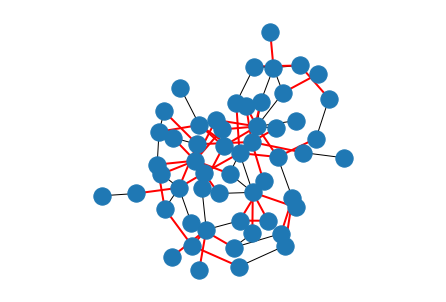

In [15]:
idx = 5
intersections = get_xing(G_list[idx], data_list[idx].gt_pos)
vis_xing(G_list[idx], data_list[idx].gt_pos, intersections)
plt.axis('equal')
plt.show()

In [7]:
layouts = ["gt_pos", "perturb", "phantom", "random_normal", "random_uniform", "flip_edges", "flip_nodes", "movlsq"]

In [ ]:
n_xing = list(tqdm(map(get_n_xing, G_list, data_list, [layouts[0]] * len(G_list)), total=len(G_list)))

In [8]:
executor = concurrent.futures.ProcessPoolExecutor(16)
for layout in layouts[6:]:
    pos_list = map(lambda d: d[layout], data_list)
    n_xing = list(tqdm(executor.map(get_n_xing, G_list, pos_list), total=len(G_list)))
    np.save(f"num_xing_{layout}.npy", np.array(n_xing))

  0%|          | 0/11531 [00:00<?, ?it/s]

  0%|          | 0/11531 [00:00<?, ?it/s]